**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [123]:
import pandas as pd
import seaborn as sns
#import numpy as np
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler

# import data 2C_weka.csv for 2 Class Classifcation.


In [124]:
TwoCData = pd.read_csv('2Classdata.csv') 

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [125]:
TwoCData.info()  # one can also use TwoCData.dtypes to get data types but info gives a lot more data incl data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [126]:
TwoCData.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [127]:
TwoCData.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [128]:
TwoCData.isnull().sum() # no blanks and no nulls for blanks i used this isna()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [129]:
TwoCData.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


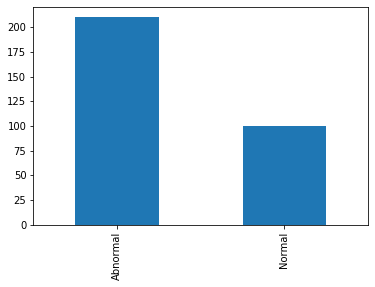

In [130]:
TwoCData['class'].value_counts().plot.bar() #rather than importing matplotlib etc. this is a smart one.. 
# i got value counts of the categories first and then plotted them as a bar chart

In [131]:
sns.pairplot(TwoCData, hue = 'class') 
"""#used class as a differentiator to plot a pairplot. Also rather than just plotting the distribution of different 
classes for pelvic_radius and sacral_slope for visualization, I have plotted the entire dataframe.

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-131-d388053d6c1e>, line 3)

In [132]:
# Correlation Table.
TwoCData.corr()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


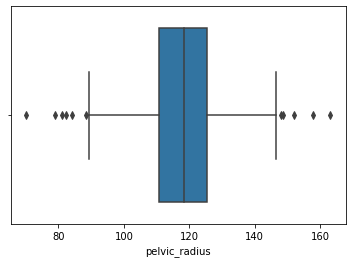

In [133]:
sns.boxplot(TwoCData['pelvic_radius'])

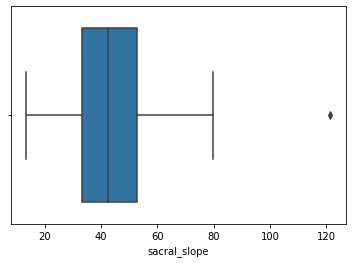

In [134]:
sns.boxplot(TwoCData['sacral_slope'])

# Encode the Class variable to integer.

In [135]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
TwoCData['class'] = le.fit_transform(TwoCData['class'])

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [136]:
X = TwoCData[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']].values

y = TwoCData['class']

# Normalize your Data (X) to get values between 0 to 1.

In [137]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       [ 0.51138997,  0.71156241, -0.41133905,  0.12612823, -1.2073033 ,
        -0.40228841],
       [-0.62664788, -0.78969266, -1.27474511, -0.21587588, -0.73345503,
        -0.4901061 ]])

# Split the dat as train and test with a ratio of 70:30.

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [140]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 217 samples.
Testing set has 93 samples.


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=11) #the lowest value of K with a great accuracy is 11, hence choosing this.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [142]:
f1score = f1_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
print(f'F1 score: {f1score} and accuracy : {acc_score}')

F1 score: 0.6779661016949152 and accuracy : 0.7956989247311828


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [143]:
""" we can do a loop of K, but as I have already highlighted above the highest accuracy of K is at 11, which 
basically means we have the lowest possible K value with the highest possible score.. I will again create a loop
below to show the same... but I have already answered this above """

for x in range(3,100):
    model = KNeighborsClassifier(n_neighbors=x) #the lowest value of K with a great accuracy is 11, hence choosing this.
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1score = f1_score(y_test,y_pred)
    acc_score = accuracy_score(y_test,y_pred)
    print(f'For Value of K {x} --- F1 score: {f1score} and accuracy : {acc_score}')
    
# value of 6, 10 and 11 all these are great in term of selection of k, however going with an odd bucket, will stick with 11

For Value of K 3 --- F1 score: 0.6557377049180328 and accuracy : 0.7741935483870968
For Value of K 4 --- F1 score: 0.6415094339622641 and accuracy : 0.7956989247311828
For Value of K 5 --- F1 score: 0.631578947368421 and accuracy : 0.7741935483870968
For Value of K 6 --- F1 score: 0.6666666666666666 and accuracy : 0.8064516129032258
For Value of K 7 --- F1 score: 0.6206896551724138 and accuracy : 0.7634408602150538
For Value of K 8 --- F1 score: 0.6296296296296297 and accuracy : 0.7849462365591398
For Value of K 9 --- F1 score: 0.6451612903225806 and accuracy : 0.7634408602150538
For Value of K 10 --- F1 score: 0.6785714285714286 and accuracy : 0.8064516129032258
For Value of K 11 --- F1 score: 0.6779661016949152 and accuracy : 0.7956989247311828
For Value of K 12 --- F1 score: 0.6428571428571429 and accuracy : 0.7849462365591398
For Value of K 13 --- F1 score: 0.6333333333333334 and accuracy : 0.7634408602150538
For Value of K 14 --- F1 score: 0.6666666666666667 and accuracy : 0.79569

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

#Install the necessary libraries

In [144]:
import seaborn as sns
import pandas as pd
import seaborn as sns

In [145]:
# importing the 3C_weka file..
ThreeCData = pd.read_csv('3Classdata.csv') 

In [146]:
ThreeCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [147]:
ThreeCData.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [148]:
ThreeCData.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [149]:
ThreeCData.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [150]:
ThreeCData.isnull().sum() # no null values

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [151]:
ThreeCData.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


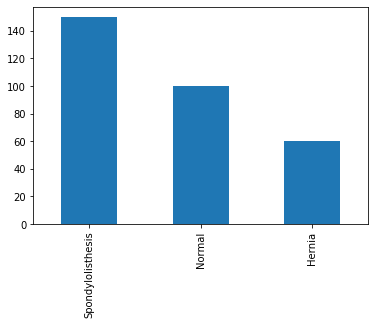

In [152]:
ThreeCData['class'].value_counts().plot.bar() #rather than importing matplotlib etc. this is a smart one.. 

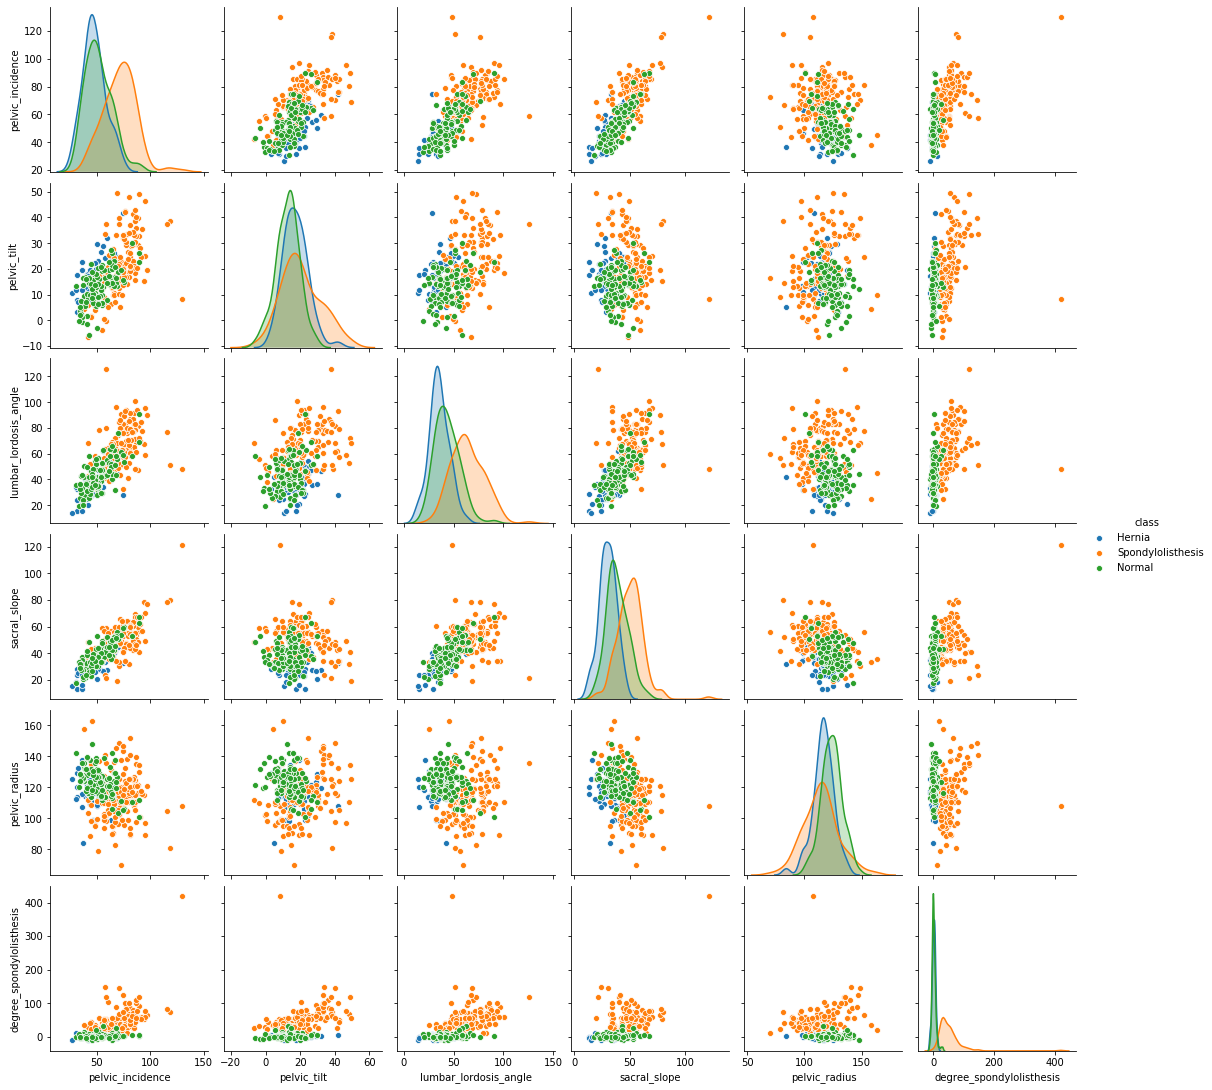

In [153]:
sns.pairplot(ThreeCData, hue = 'class') 

In [154]:
# Correlation Table.
ThreeCData.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


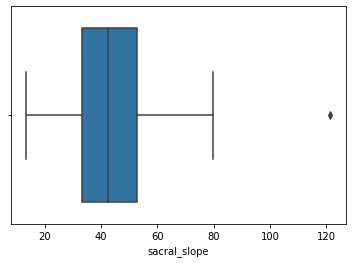

In [155]:
sns.boxplot(ThreeCData['sacral_slope'])

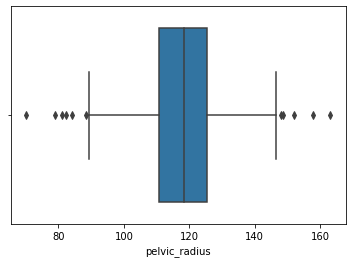

In [156]:
sns.boxplot(ThreeCData['pelvic_radius'])

In [157]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ThreeCData['class'] = le.fit_transform(ThreeCData['class'])

In [158]:
X_3 = TwoCData[['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']].values

y_3 = TwoCData['class']

In [159]:
from sklearn.preprocessing import StandardScaler

X_3 = StandardScaler().fit(X_3).transform(X_3.astype(float))
X_3[0:5]

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       [ 0.51138997,  0.71156241, -0.41133905,  0.12612823, -1.2073033 ,
        -0.40228841],
       [-0.62664788, -0.78969266, -1.27474511, -0.21587588, -0.73345503,
        -0.4901061 ]])

In [160]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Show the results of the split
print("Training set has {} samples.".format(X3_train.shape[0]))
print("Testing set has {} samples.".format(X3_test.shape[0]))

Training set has 217 samples.
Testing set has 93 samples.


In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [163]:
""" doing a loop to find the correct value of k to take """

for y in range(3,100):
    model = KNeighborsClassifier(n_neighbors=y) #the lowest value of K with a great accuracy is 11, hence choosing this.
    model.fit(X3_train, y3_train)
    y3_pred = model.predict(X3_test)
    
    f1score3 = f1_score(y3_test,y3_pred)
    acc_score3 = accuracy_score(y3_test,y3_pred)
    print(f'For Value of K {y} --- F1 score: {f1score3} and accuracy : {acc_score3}')
    
# same as above, the correct valuel of K to take is 11

For Value of K 3 --- F1 score: 0.6557377049180328 and accuracy : 0.7741935483870968
For Value of K 4 --- F1 score: 0.6415094339622641 and accuracy : 0.7956989247311828
For Value of K 5 --- F1 score: 0.631578947368421 and accuracy : 0.7741935483870968
For Value of K 6 --- F1 score: 0.6666666666666666 and accuracy : 0.8064516129032258
For Value of K 7 --- F1 score: 0.6206896551724138 and accuracy : 0.7634408602150538
For Value of K 8 --- F1 score: 0.6296296296296297 and accuracy : 0.7849462365591398
For Value of K 9 --- F1 score: 0.6451612903225806 and accuracy : 0.7634408602150538
For Value of K 10 --- F1 score: 0.6785714285714286 and accuracy : 0.8064516129032258
For Value of K 11 --- F1 score: 0.6779661016949152 and accuracy : 0.7956989247311828
For Value of K 12 --- F1 score: 0.6428571428571429 and accuracy : 0.7849462365591398
For Value of K 13 --- F1 score: 0.6333333333333334 and accuracy : 0.7634408602150538
For Value of K 14 --- F1 score: 0.6666666666666667 and accuracy : 0.79569